In [87]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

data = pd.read_csv('pre-processed.csv')
print(data)
og6k = pd.read_csv('og6K.csv')
print(og6k)

C:\Users\royde\AppData\Local\Temp\ipykernel_5168\794604533.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


      esi  age  gender  bronchitis  cardiaarrst  cardiacanom  carditis  \
0     3.0   66    Male           0            0            0         0   
1     2.0   80    Male           0            0            0         0   
2     3.0   80    Male           0            0            0         0   
3     2.0   80    Male           0            0            0         0   
4     3.0   80    Male           0            0            0         0   
...   ...  ...     ...         ...          ...          ...       ...   
4100  4.0   66  Female           0            0            0         0   
4101  2.0   18  Female           0            0            0         0   
4102  4.0   18  Female           0            0            0         0   
4103  3.0   43  Female           0            0            0         0   
4104  3.0   59  Female           0            0            0         0   

      chestpain  chfnonhp  copd  ...  cc_hypotension  cc_influenza  cc_nausea  \
0             1         1     

In [90]:
data['gender'] = data['gender'].replace("Male", 1)
data['gender'] = data['gender'].replace("Female", 0)

column_list = data.columns.values
cc_list = ['esi']
vitals_list = ['esi', 'glucose_median']
symptoms_list = ['esi']

for _ in column_list:
    if "cc" in _:
        cc_list.append(_)
data_cc = data.filter(cc_list, axis=1)

for _ in column_list:
    if "triage" in _:
        vitals_list.append(_)
data_vitals = data.filter(vitals_list, axis=1)

for _ in column_list:
    if _ not in cc_list:
        if _ not in vitals_list:
            symptoms_list.append(_)
symptoms_list.remove("age")
symptoms_list.remove("gender")
data_symptoms = data.filter(symptoms_list, axis=1)



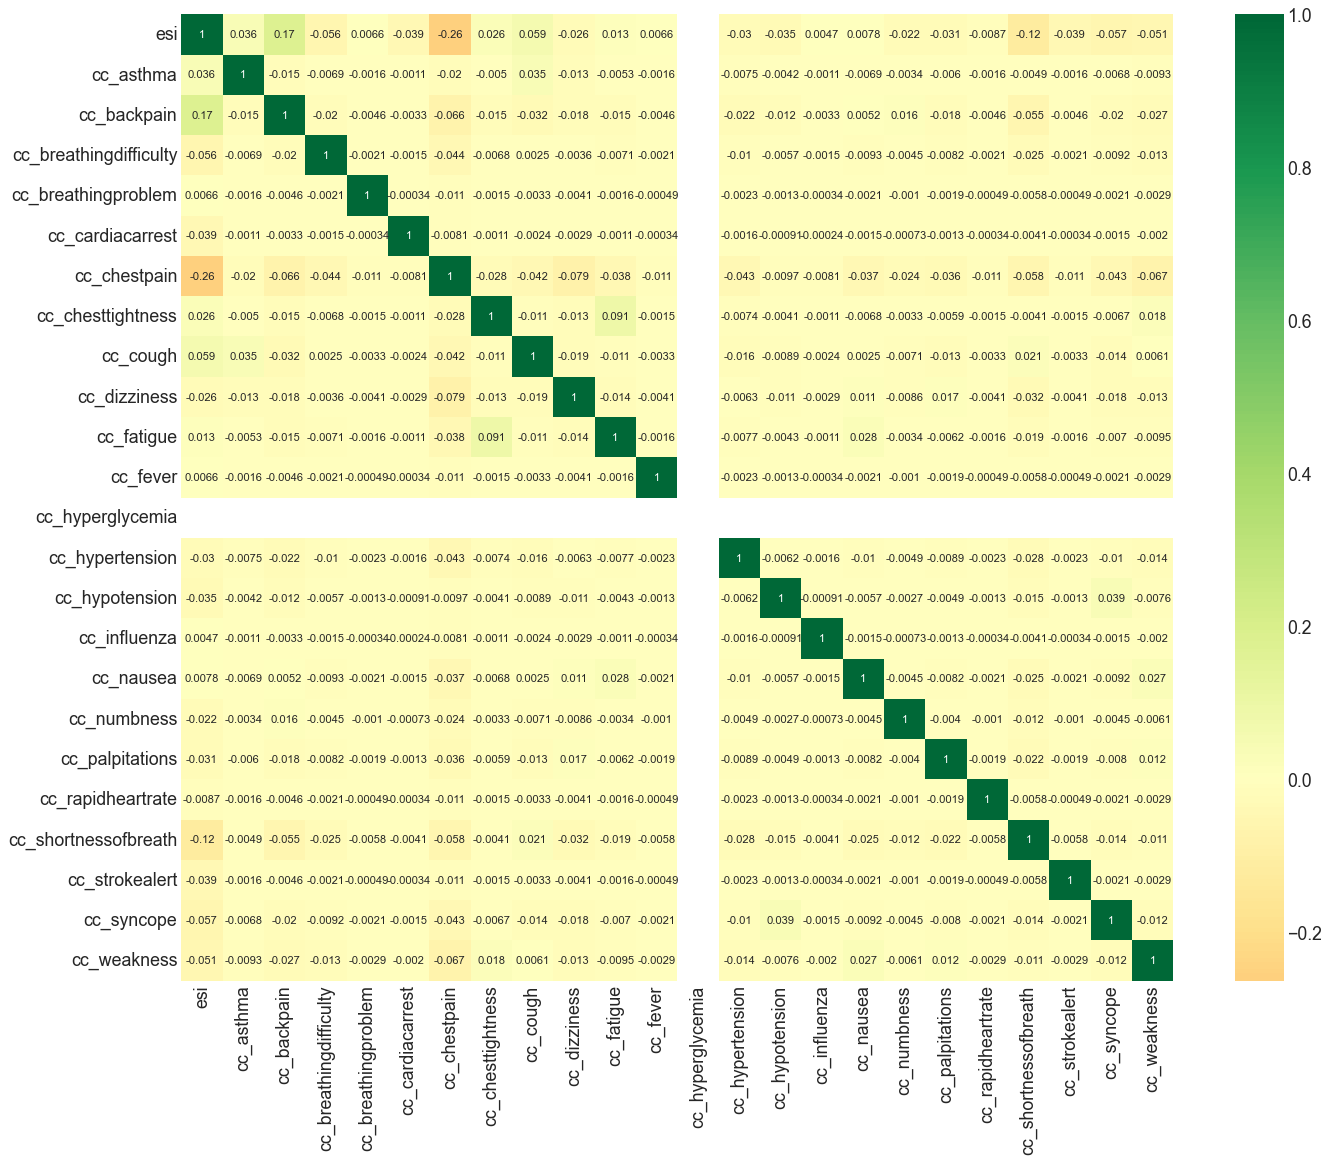

In [31]:
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(data_cc.corr(), xticklabels=data_cc.corr().columns, yticklabels=data_cc.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.show()

C:\Users\royde\AppData\Local\Temp\ipykernel_5168\789435947.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


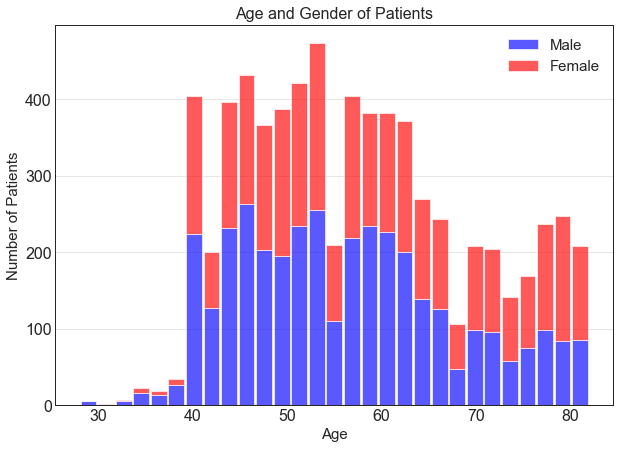

In [43]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(figsize=(10,7))
age_male = og6k[og6k['gender']==1]['age']
age_female = og6k[og6k['gender']==0]['age']
n, bins, patches = plt.hist(x = [age_male, age_female], stacked=True, bins='auto', color=['blue', 'red'], alpha=0.65, rwidth=0.90)

plt.grid(axis='y', alpha = 0.60)
plt.legend(['Male', 'Female'], fontsize = 15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Patients', fontsize=15)
plt.title('Age and Gender of Patients')

plt.show()

C:\Users\royde\AppData\Local\Temp\ipykernel_5168\1541048293.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(og6k_adjusted.corr(), xticklabels=og6k_adjusted.corr().columns, yticklabels=og6k_adjusted.corr().columns, cmap='RdYlGn', center=0, annot=True)


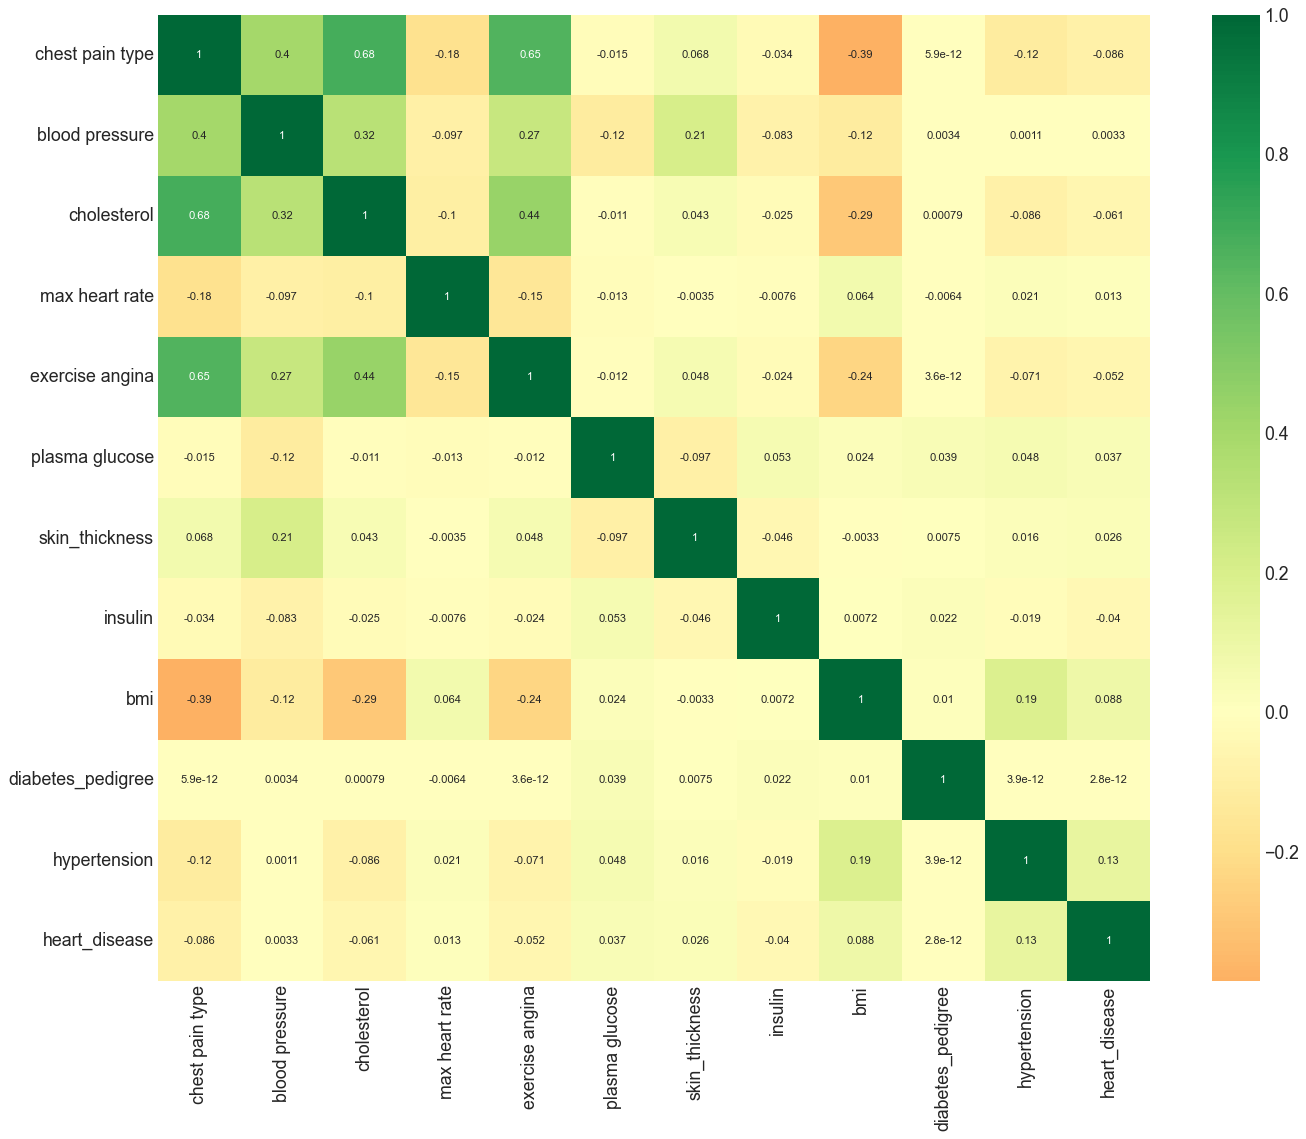

In [44]:
og6k_list  = og6k.columns.values
og6k_rest = og6k_list[3:]
og6k_adjusted = og6k.filter(og6k_rest, axis=1)
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(og6k_adjusted.corr(), xticklabels=og6k_adjusted.corr().columns, yticklabels=og6k_adjusted.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.show()

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(data_symptoms.drop('esi',1), 
                                                    data_symptoms['esi'],
                                                    test_size=0.3,
                                                    random_state=0) 

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

C:\Users\royde\AppData\Local\Temp\ipykernel_5168\2235509341.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(data.drop('esi',1),


In [150]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  # print("AUC is: ", roc_auc_score(y_test, y_pred))
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  # fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  # plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  # plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  # plt.xlim([0.0, 1.0])
  # plt.ylim([0.0, 1.0])
  # plt.xlabel('False Positive Rate or (1 - Specifity)')
  # plt.ylabel('True Positive Rate or (Sensitivity)')
  # plt.title('Receiver Operating Characteristic')

In [151]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs') 
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.60      0.55      0.57       448
         3.0       0.55      0.73      0.63       594
         4.0       0.62      0.12      0.21       163
         5.0       0.00      0.00      0.00        21

    accuracy                           0.57      1232
   macro avg       0.36      0.28      0.28      1232
weighted avg       0.57      0.57      0.54      1232

Confusion Matrix: 
 [[  0   4   2   0   0]
 [  0 246 202   0   0]
 [  0 148 436  10   0]
 [  0  11 132  20   0]
 [  0   1  18   2   0]]


c:\Users\royde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\royde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\royde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

In [242]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100) # Define the model
model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)
evaluate_on_training_set(y_test, y_pred)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.62      0.58      0.60       448
         3.0       0.57      0.75      0.65       594
         4.0       0.58      0.11      0.19       163
         5.0       0.00      0.00      0.00        21

    accuracy                           0.59      1232
   macro avg       0.35      0.29      0.29      1232
weighted avg       0.58      0.59      0.56      1232

Confusion Matrix: 
 [[  0   6   0   0   0]
 [  0 259 187   2   0]
 [  0 137 447  10   0]
 [  0  13 132  18   0]
 [  0   4  16   1   0]]


c:\Users\royde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\royde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\royde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,